In [2]:
#Deal with data coming from the single ring cutted from compound1
#Absorption and DOS are plotted
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#compound1

In [4]:
#Absorption
g09abs=np.loadtxt('absorption/g09abs.dat', usecols=range(2))  #nm int
DFTBabs=np.loadtxt('absorption/DFTBabs.dat', usecols=range(2))  #eV int
Expabs=np.loadtxt('absorption/ExpAbsInDCM.dat',usecols=range(2)) #nm int

In [5]:
#nm -> eV
g09abs[:,0]=1239.841/g09abs[:,0]
Expabs[:,0]=1239.841/Expabs[:,0]

(1, 3.5)

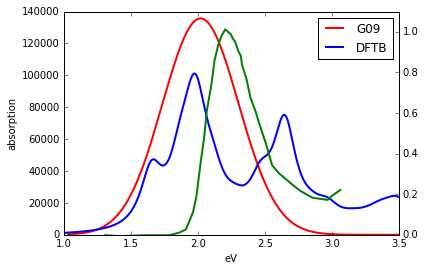

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(g09abs[:,0],g09abs[:,1],'r', linewidth=2,
         label='G09')
ax1.plot(DFTBabs[:,0],DFTBabs[:,1],'b',linewidth=2,
        label='DFTB')
ax2 = ax1.twinx()
ax2.plot(Expabs[:,0],Expabs[:,1],'g',linewidth=2,
        label='Exp')
ax2.set_ylim(0,1.1)
ax1.set_xlabel('eV')
ax1.set_ylabel('absorption')
ax1.legend(loc='best')
ax1.set_xlim(1,3.5)

In [7]:
#DOS  eV int
dftb_dos_b=np.loadtxt('DOS/DFTB/dos_b.dat',usecols=range(2)) 
dftb_dos_n=np.loadtxt('DOS/DFTB/dos_n.dat',usecols=range(2))
dftb_dos_f=np.loadtxt('DOS/DFTB/dos_f.dat',usecols=range(2))
dftb_dos_o=np.loadtxt('DOS/DFTB/dos_o.dat',usecols=range(2))
dftb_dos_s=np.loadtxt('DOS/DFTB/dos_s.dat',usecols=range(2))
dftb_dos_c=np.loadtxt('DOS/DFTB/dos_c.dat',usecols=range(2))
dftb_dos_h=np.loadtxt('DOS/DFTB/dos_h.dat',usecols=range(2))
g09DOS=np.loadtxt('DOS/DFT/PDOS.dat', usecols=range(10))  

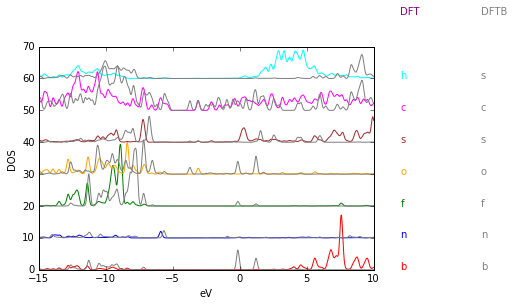

In [8]:
fig, ax2 = plt.subplots()
ax2.set_xlim(-15,10)
ax2.set_xlabel('eV')
ax2.set_ylabel('DOS')
#DFT
ax2.plot(g09DOS[:,0],abs(g09DOS[:,3])*20,'red')
ax2.plot(g09DOS[:,0],abs(g09DOS[:,7])*20+10,'blue')
ax2.plot(g09DOS[:,0],abs(g09DOS[:,5])*20+20,'green')
ax2.plot(g09DOS[:,0],abs(g09DOS[:,8])*20+30,'orange')
ax2.plot(g09DOS[:,0],abs(g09DOS[:,9])*5+40,'brown')
ax2.plot(g09DOS[:,0],abs(g09DOS[:,4])*5+50,'magenta')
ax2.plot(g09DOS[:,0],abs(g09DOS[:,6])*5+60,'cyan')
ax2.text(12,  0, 'b',color='red')
ax2.text(12, 10, 'n',color='blue')
ax2.text(12, 20, 'f',color='green')
ax2.text(12, 30, 'o',color='orange')
ax2.text(12, 40, 's',color='brown')
ax2.text(12, 50, 'c',color='magenta')
ax2.text(12, 60, 'h',color='cyan')
ax2.text(12, 80, 'DFT',color='purple')
#DFTB
ax2.plot(dftb_dos_b[:,0],dftb_dos_b[:,1]*2,'gray')
ax2.plot(dftb_dos_n[:,0],dftb_dos_n[:,1]*2+10,'gray')
ax2.plot(dftb_dos_f[:,0],dftb_dos_f[:,1]*2+20,'gray')
ax2.plot(dftb_dos_o[:,0],dftb_dos_o[:,1]*2+30,'gray')
ax2.plot(dftb_dos_s[:,0],dftb_dos_s[:,1]*0.5+40,'gray')
ax2.plot(dftb_dos_c[:,0],dftb_dos_c[:,1]*0.5+50,'gray')
ax2.plot(dftb_dos_h[:,0],dftb_dos_h[:,1]*0.5+60,'gray')
ax2.text(18,80,'DFTB',color='gray')
ax2.text(18,  0, 'b',color='gray')
ax2.text(18, 10, 'n',color='gray')
ax2.text(18, 20, 'f',color='gray')
ax2.text(18, 30, 'o',color='gray')
ax2.text(18, 40, 's',color='gray')
ax2.text(18, 50, 'c',color='gray')
ax2.text(18, 60, 's',color='gray')

In [ ]:
#calculation of Contribution of each element in HOMO-LUMO
#major peak HOMO-1 -> LUMO+1
#           HOMO   -> LUMO

In [14]:
nAtomB=2
nAtomC=65
nAtomF=4
nAtomH=57
nAtomN=1
nAtomO=4
nAtomS=8
inxB=[0,0];inxC=[0,0];inxF=[0,0];inxH=[0,0,];inxN=[0,0];inxO=[0,0];inxS=[0,0]
inxB[0]=1
inxB[1]=nAtomB*4
inxC[0]=inxB[1]+1
inxC[1]=inxB[1]+nAtomC*4
inxF[0]=inxC[1]+1
inxF[1]=inxC[1]+nAtomF*4
inxH[0]=inxF[1]+1
inxH[1]=inxF[1]+nAtomH*1
inxN[0]=inxH[1]+1
inxN[1]=inxH[1]+nAtomN*4
inxO[0]=inxN[1]+1
inxO[1]=inxN[1]+nAtomO*4
inxS[0]=inxO[1]+1
inxS[1]=inxO[1]+nAtomS*4
inx=[inxB,inxC,inxF,inxH,inxN,inxO,inxS]
print inx

[[1, 8], [9, 268], [269, 284], [285, 341], [342, 345], [346, 361], [362, 393]]


In [15]:
label=['B','C','F','H','N','O','S']

In [16]:
def calContribution(label,filename):
    with open(filename,'r') as infile:
        next(infile)
        arr = [float(line.split()[0]) for line in infile]
        
    npArray=np.array(arr)
    npArray2=npArray**2
    arrSum=np.sum(npArray2)
    Coef=[]
    for j in range(len(inx)):
        temp=0.0
        for i in range(inx[j][0]-1,inx[j][1]):
            temp=temp+npArray2[i]
        temp=temp/arrSum
        Coef.append(temp)
    contribution=zip(label,Coef)
    return contribution

In [17]:
filename='absorption/HOMO-1.dat'
HOMOm1contrib=calContribution(label,filename)
print HOMOm1contrib

[('B', 2.9007062180529502e-11), ('C', 0.2150292394565331), ('F', 0.0058188291913120905), ('H', 0.43388999685853263), ('N', 0.19033965958397386), ('O', 0.13391795538574802), ('S', 0.021004319494893356)]


In [18]:
filename='absorption/HOMO.dat'
HOMOcontrib=calContribution(label,filename)
print HOMOcontrib

[('B', 4.4436745824543808e-12), ('C', 0.45140931610004897), ('F', 0.26233445928944138), ('H', 0.22036787432369884), ('N', 0.0039375592474042874), ('O', 0.033287441266486112), ('S', 0.028663349768476905)]


In [19]:
filename='absorption/LUMO.dat'
LUMOcontrib=calContribution(label,filename)
print LUMOcontrib

[('B', 1.172000424926175e-11), ('C', 0.33777949090070036), ('F', 0.13775884564949653), ('H', 0.50278490771806261), ('N', 0.00069482017320913146), ('O', 0.0086795506435207552), ('S', 0.012302384903290966)]


In [20]:
filename='absorption/LUMO+1.dat'
LUMOp1contrib=calContribution(label,filename)
print LUMOp1contrib

[('B', 1.3642393926000118e-13), ('C', 0.23647999934507996), ('F', 0.58238672691603932), ('H', 0.17750560254250392), ('N', 0.001549524204176142), ('O', 0.00072462203572196148), ('S', 0.001353524956342222)]
